<a href="https://colab.research.google.com/github/andresizer/alura-data/blob/main/Imers%C3%A3o_Dados_4_Aula_02_Analisando_im%C3%B3veis_de_S%C3%A3o_Paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas e conhecendo a base de dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
url = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
dados = pd.read_csv(url)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


#Início da Aula 02

**A coluna Valor não é do tipo correto para trabalhar. Vamos organizar a coluna.

**Primeiro separando os números do resto**

In [3]:
dados['Valor'].str.split(expand = True)[0].unique()

array(['R$'], dtype=object)

**Agora criamos uma variável desse DataFrame**

In [4]:
valor = dados['Valor'].str.split(expand = True)
valor

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


**Inserimos esse DataFrame no banco de dados original**

In [5]:
dados[['Moeda', 'Valor_correto', 'Tipo_anuncio']] = valor

In [6]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_correto,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


**Vamos eliminar os valores que não forem de vendas de duas maneiras diferentes**

In [7]:
tipo_nulo = dados['Tipo_anuncio'].isnull()

dados_vendas = dados.query('@tipo_nulo')
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_correto,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [8]:
dados_vendas = dados[dados['Tipo_anuncio'].isnull()]
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_correto,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


Rodamos esse código para confirmar que funcionou

In [9]:
dados_vendas['Tipo_anuncio'].unique()

array([None], dtype=object)

**Feito isso para fins didáticos, vamos deixar na maneira mais prática**

In [10]:
dados_vendas.drop(['Moeda', 'Valor', 'Tipo_anuncio'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_correto
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000


**Agora vamos arrumar o nome da coluna Valor_correto para apenas Valor, mantendo o padrão**

In [12]:
dados_vendas.rename(columns={'Valor_correto' : 'Valor'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000


In [14]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6107 non-null   object
 1   Bairro     9146 non-null   object
 2   Cidade     9156 non-null   object
 3   Metragem   9156 non-null   int64 
 4   Quartos    9156 non-null   int64 
 5   Banheiros  9156 non-null   int64 
 6   Vagas      9156 non-null   int64 
 7   Valor      9156 non-null   object
dtypes: int64(4), object(4)
memory usage: 643.8+ KB


**Agora vamos passar o número para formato do tipo numérico e eliminar os pontos**

In [15]:
dados_vendas['Valor'] = dados_vendas['Valor'].str.replace('.', '').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rua        6107 non-null   object 
 1   Bairro     9146 non-null   object 
 2   Cidade     9156 non-null   object 
 3   Metragem   9156 non-null   int64  
 4   Quartos    9156 non-null   int64  
 5   Banheiros  9156 non-null   int64  
 6   Vagas      9156 non-null   int64  
 7   Valor      9156 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 643.8+ KB


In [17]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


In [18]:
dados_vendas[['Rua', 'Bairro', 'Cidade']].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


**Vemos que os dados do campo valor estão expressos em milhões de reais, vamos dividir para ficar um valor mais coerente**

In [19]:
dados_vendas['Valor'] = (dados_vendas['Valor'] / 1000000).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.70
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,0.38
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,0.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,0.54


# Desafios aula 02

Fazer um gráfico de histograma de maneira legível

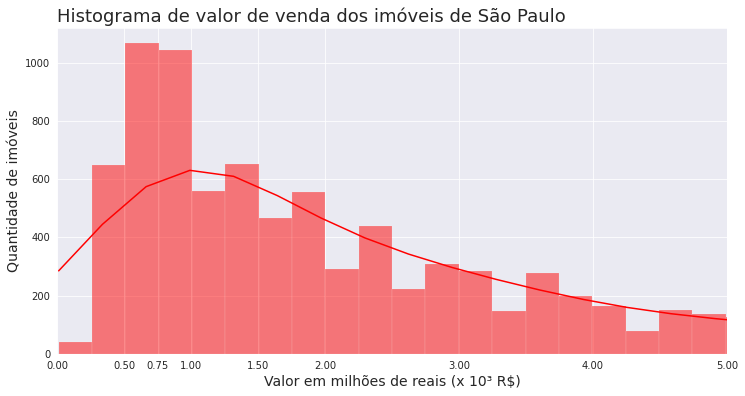

In [21]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.histplot(x = 'Valor', data = dados_vendas, kde = True, color = 'r')
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma de valor de venda dos imóveis de São Paulo', loc = 'left', fontsize = 18)
ax.set_xlabel('Valor em milhões de reais (x 10³ R$)', fontsize = 14)
ax.set_ylabel('Quantidade de imóveis', fontsize = 14)
plt.xlim(left = 0, right = 5)
plt.xticks([0, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5])
plt.show()

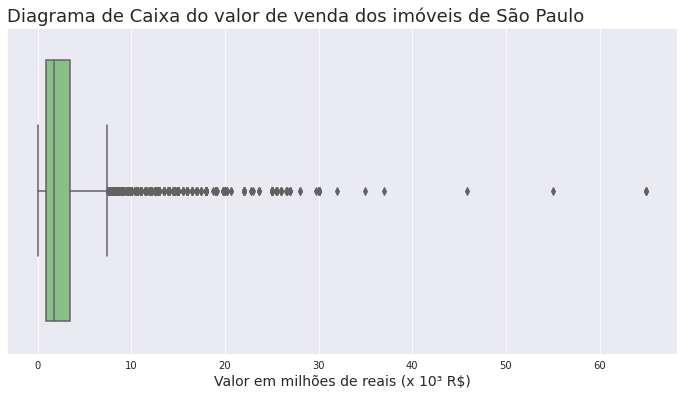

In [22]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.boxplot(x=dados_vendas['Valor'])
ax.figure.set_size_inches(12,6)
ax.set_title('Diagrama de Caixa do valor de venda dos imóveis de São Paulo', loc = 'left', fontsize = 18)
ax.set_xlabel('Valor em milhões de reais (x 10³ R$)', fontsize = 14)
plt.show()

Com o auxílio desses dois gráficos podemos inferir que a imensa maioria dos imóvies custa até de R$1.000.000,00.

Porém o desvio padrão é muito alto e existem muitos imóveis fora da média, deve-se tratar melhor os dados para ter um valor mais coerente com a realidade

**Preço do metro quadrado por bairro e plotar em um gráfico ideal**

In [23]:
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.70
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,0.38
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,0.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,0.54


In [24]:
dados_vendas['preco_m2'] = (dados_vendas['Valor'] / dados_vendas['Metragem'] * 1000000).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
preco_m2_por_bairro = (dados_vendas.groupby('Bairro')['preco_m2'].mean()).round(2).to_frame()
preco_m2_por_bairro

,preco_m2
Bairro,
Aclimação,7656.00
Alto da Boa Vista,5849.57
Alto da Lapa,7606.10
Alto da Mooca,5690.84
Alto de Pinheiros,11269.83
...,...
Vila Água Funda,4467.13
Água Branca,7270.09
Água Fria,5867.41


In [26]:
preco_m2_por_bairro = preco_m2_por_bairro.sort_values('preco_m2')

In [27]:
preco_m2_por_bairro

,preco_m2
Bairro,
Sítio Represa,78.38
Jardim Vera Cruz(Zona Leste),544.76
Vila Aurea,879.12
Jardim Brasília (Zona Leste),1055.01
Jardim Itapemirim,1078.43
...,...
Vila Nova Conceição,17615.17
Jardim Europa,19962.71
Jardim Ampliação,20052.08


In [28]:
preco_m2_por_bairro.reset_index(inplace = True)

**Existem dois valores muito discrepantes, vamos eliminá-los**

In [39]:
preco_m2_por_bairro

,Bairro,preco_m2
0,Jardim Vera Cruz(Zona Leste),544.76
1,Vila Aurea,879.12
2,Jardim Brasília (Zona Leste),1055.01
3,Jardim Itapemirim,1078.43
4,Guaianazes,1160.71
...,...,...
690,Jardim Teresa,17465.56
691,Vila Nova Conceição,17615.17
692,Jardim Europa,19962.71
693,Jardim Ampliação,20052.08


In [30]:
preco_m2_por_bairro.drop(index = 696, axis = 0, inplace = True)
preco_m2_por_bairro.drop(index = 0, axis = 0, inplace = True)

In [38]:
preco_m2_por_bairro.reset_index(inplace = True)
preco_m2_por_bairro.drop(columns = 'index', axis = 1, inplace = True)

Encontramos o preço do m² por bairro!

In [40]:
preco_m2_por_bairro

,Bairro,preco_m2
0,Jardim Vera Cruz(Zona Leste),544.76
1,Vila Aurea,879.12
2,Jardim Brasília (Zona Leste),1055.01
3,Jardim Itapemirim,1078.43
4,Guaianazes,1160.71
...,...,...
690,Jardim Teresa,17465.56
691,Vila Nova Conceição,17615.17
692,Jardim Europa,19962.71
693,Jardim Ampliação,20052.08


Agora vamos plotar o gráfico

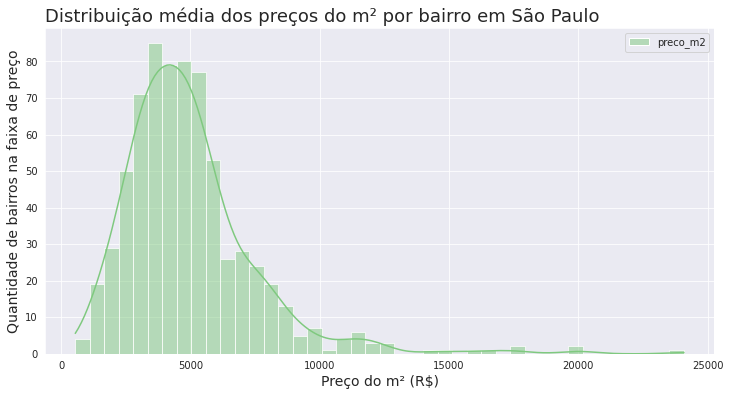

In [42]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
bx = sns.histplot( data = preco_m2_por_bairro, kde = True)
bx.figure.set_size_inches(12,6)
bx.set_title('Distribuição média dos preços do m² por bairro em São Paulo', loc = 'left', fontsize = 18)
bx.set_xlabel('Preço do m² (R$)', fontsize = 14)
bx.set_ylabel('Quantidade de bairros na faixa de preço', fontsize = 14)
bx = bx

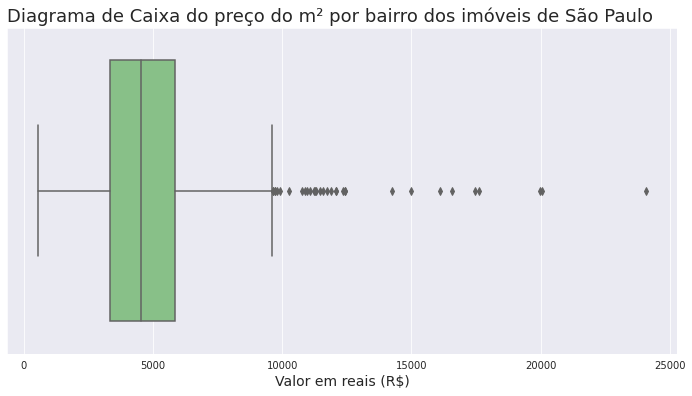

In [45]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.boxplot(x=preco_m2_por_bairro['preco_m2'])
ax.figure.set_size_inches(12,6)
ax.set_title('Diagrama de Caixa do preço do m² por bairro dos imóveis de São Paulo', loc = 'left', fontsize = 18)
ax.set_xlabel('Valor em reais (R$)', fontsize = 14)
plt.show()

**Analisando os gráficos nota-se que a imensa maioria dos bairros de São Paulo tem o m² custando entre 3 e 6 mil reais. Alguma discrepância nos dados pode ser devido a uma falta de limpeza no banco de dados**